In [ ]:
%config InlineBackend.figure_format = 'retina'

In [ ]:
#accuracies for fc6 lesion dropoff and no dropoff
!wget -nc https://www.dropbox.com/s/vedalmxazfn15ub/accuracies.zip?dl=0
!unzip accuracies.zip?dl=0

#accuracies for all layers lesioned dropoff
!wget -nc https://www.dropbox.com/s/dkcnr93ibql2m0l/run_lesioned_val_all_layers.zip?dl=0
!unzip run_lesioned_val_all_layers.zip?dl=0

In [ ]:
import pickle

def dict_save(dict, file_name):
    with open(file_name + '.pickle', 'wb') as f:
        pickle.dump(dict, f, pickle.HIGHEST_PROTOCOL)

def dict_load(dict_name):
    with open(dict_name , 'rb') as f:
        return pickle.load(f)

In [ ]:
#loading accuracies
EarlyV_alexnetgn_1x_fc6_acc = dict_load('/content/accuracies/EarlyV_alexnetgn_1x_fc6_0_accuracies.pickle')
pOTC_alexnetgn_1x_fc6_acc = dict_load('/content/accuracies/pOTC_alexnetgn_1x_fc6_0_accuracies.pickle')
aOTC_alexnetgn_1x_fc6_acc = dict_load('/content/accuracies/aOTC_alexnetgn_1x_fc6_0_accuracies.pickle')
random_alexnetgn_1x_fc6_acc = dict_load('/content/accuracies/random_alexnetgn_1x_fc6_0_accuracies.pickle')

EarlyV_pretrained_alexnet_classifier1_acc = dict_load('/content/accuracies/EarlyV_pretrained_alexnet_classifier1_accuracies.pickle')
pOTC_pretrained_alexnet_classifier1_acc = dict_load('/content/accuracies/pOTC_pretrained_alexnet_classifier1_accuracies.pickle')
aOTC_pretrained_alexnet_classifier1_acc = dict_load('/content/accuracies/aOTC_pretrained_alexnet_classifier1_accuracies.pickle')
random_pretrained_alexnet_classifier1_acc = dict_load('/content/accuracies/random_pretrained_alexnet_classifier1_accuracies.pickle')

In [ ]:
#checking pretrained alexnet accuracies
print("PRETRAINED ALEXNET")
accuracy_metrics = ['top1s', 'top5s', 'losses']
regions = ['EarlyV', 'pOTC', 'aOTC', 'random']
for metric in accuracy_metrics:
  print("\n\nmetric:", metric, '\n')
  print(regions[0],":", EarlyV_pretrained_alexnet_classifier1_acc[metric])
  print(regions[1],":", pOTC_pretrained_alexnet_classifier1_acc[metric])
  print(regions[2],":", aOTC_pretrained_alexnet_classifier1_acc[metric])
  print(regions[3],":", random_pretrained_alexnet_classifier1_acc[metric], '\n')


In [ ]:
#checking aexnetgn accuracies
print("ALEXNET GN")
accuracy_metrics = ['top1s', 'top5s', 'losses']
regions = ['EarlyV', 'pOTC', 'aOTC', 'random']
for metric in accuracy_metrics:
  print("\n\nmetric:", metric, "\n")
  print(regions[0],":", EarlyV_alexnetgn_1x_fc6_acc[metric])
  print(regions[1],":", pOTC_alexnetgn_1x_fc6_acc[metric])
  print(regions[2],":", aOTC_alexnetgn_1x_fc6_acc[metric])
  print(regions[3],":", random_alexnetgn_1x_fc6_acc[metric], '\n')

In [ ]:
#no lesion scores
import numpy as np
pretrained_alexnet_top1 = np.array([56.5440])
pretrained_alexnet_top5 = np.array([79.1080])
pretrained_alexnet_loss = np.array([1.9101363607025146])

alexnetgn_1x_top1 = np.array([60.593997955322266])
alexnetgn_1x_top5 = np.array([82.19400024414062])
alexnetgn_1x_loss = np.array([1.7449316347503663])

Lesion FC6

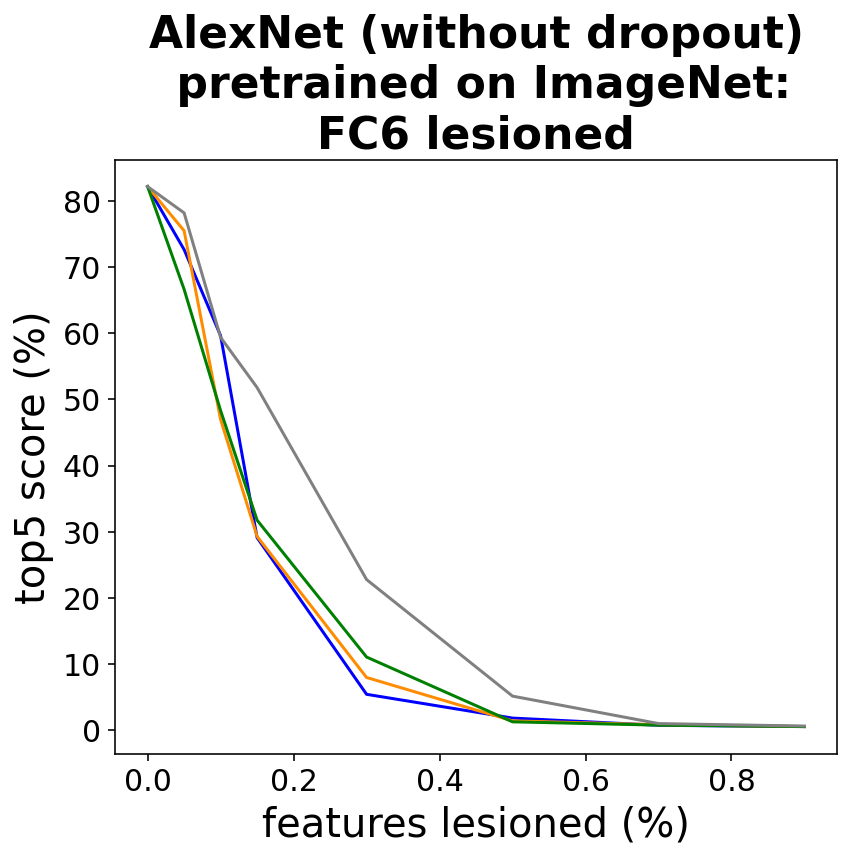

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#define model
#model_name = 'pretrained_alexnet_classifier1'
model_name = 'alexnetgn_1x_fc6_0'

#define accuracy metric
accuracy = 'top5s' #top1s, top5s, losses

#original score with no lesions
#original_score = pretrained_alexnet_top5
original_score = alexnetgn_1x_top5

#0 added to percentages to include no lesion score
percentages = list(np.array([0, .05, .10, .15, .30, .50, .70, .90]))

#brain regions and random
regions = ['EarlyV', 'pOTC','aOTC', 'random']

#colors for regions
colors = ['blue', 'darkorange', 'green', 'gray']

#plt.figure(dpi=250)
for i in range(len(regions)):
  region = regions[i]
  plt.rcParams["figure.figsize"] = (6,6)
  lesioned_scores = dict_load('/content/accuracies/'+region+'_'+model_name+'_accuracies.pickle')[accuracy]
  top5s = np.concatenate((original_score, lesioned_scores))
  plt.plot(percentages, top5s, colors[i], label=region)
  plt.tight_layout()
  #plt.legend(loc="upper right", prop={'size':13})
  #plt.title('AlexNet (with dropout)\n pretrained on ImageNet:\nFC6 lesioned', size=22, fontweight="bold")
  plt.title('AlexNet (without dropout)\n pretrained on ImageNet:\nFC6 lesioned', size=22, fontweight="bold")
  plt.xlabel('features lesioned (%)', size=20)
  plt.xticks(size=15)
  plt.ylabel(accuracy.replace("s","")+ " score (%)", size=20)
  plt.yticks(size=15)
#saving fig
#plt.savefig('pretrained alexnet '+accuracy+".png", dpi=300)
plt.savefig('no drop off alexnet '+accuracy+'.png', dpi=300)


Lesion all layers

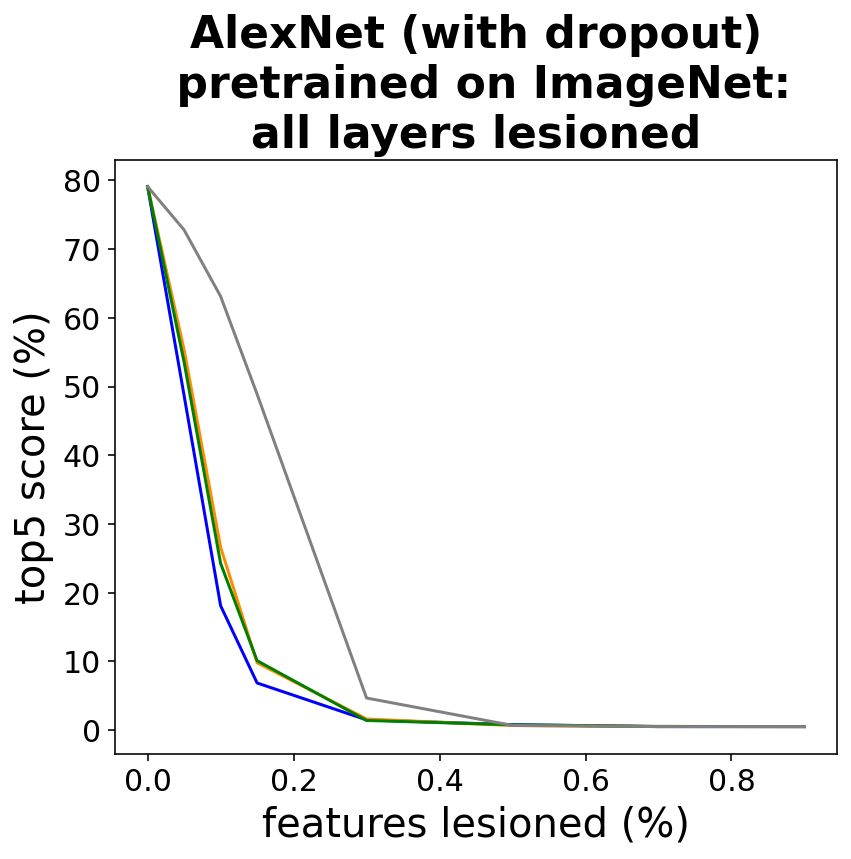

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#define model
model_name = 'pretrained_alexnet_classifier1'


#define accuracy metric
accuracy = 'top5s' #top1s, top5s, losses

#original score with no lesions
original_score = pretrained_alexnet_top5

#0 added to percentages to include no lesion score
percentages = list(np.array([0, .05, .10, .15, .30, .50, .70, .90]))

#brain regions and random
regions = ['EarlyV', 'pOTC','aOTC', 'random']

#colors for regions
colors = ['blue', 'darkorange', 'green', 'gray']
#plt.figure(dpi=250)
for i in range(len(regions)):
  region = regions[i]
  plt.rcParams["figure.figsize"] = (6,6)
  lesioned_scores = dict_load('/content/run_lesioned_val_all_layers/'+region+'_all_layers_accuracies.pickle')[accuracy]
  top5s = np.concatenate((original_score, lesioned_scores))
  plt.plot(percentages, top5s, colors[i], label=region)
  plt.tight_layout()
  #plt.legend(loc="upper right", prop={'size':13})
  plt.title('AlexNet (with dropout)\n pretrained on ImageNet:\nall layers lesioned', size=22, fontweight="bold")
  plt.xlabel('features lesioned (%)', size=20)
  plt.xticks(size=15)
  plt.ylabel(accuracy.replace("s","")+ " score (%)", size=20)
  plt.yticks(size=15)
#saving fig
plt.savefig('pretrained alexnet all_layers'+accuracy+".png", dpi=300)

#Shared Features?

In [ ]:
!wget -nc https://www.dropbox.com/s/d3h6veqbxfcud5u/EarlyV_pretrained_alexnet_classifier1_feature_idxs.pickle?dl=0
!wget -nc https://www.dropbox.com/s/szfm8068hmyy1lx/pOTC_pretrained_alexnet_classifier1_feature_idxs.pickle?dl=0
!wget -nc https://www.dropbox.com/s/2ohi5ngsn6w8kch/aOTC_pretrained_alexnet_classifier1_feature_idxs.pickle?dl=0

!wget -nc https://www.dropbox.com/s/lk92j9eycivuryb/EarlyV_alexnetgn_1x_fc6.0_feature_idxs.pickle?dl=0
!wget -nc https://www.dropbox.com/s/8ukby7ijywpfaeh/pOTC_alexnetgn_1x_fc6.0_feature_idxs.pickle?dl=0
!wget -nc https://www.dropbox.com/s/housr9fteudluu6/aOTC_alexnetgn_1x_fc6.0_feature_idxs.pickle?dl=0

In [ ]:
earlyv_gn = dict_load('EarlyV_alexnetgn_1x_fc6.0_feature_idxs.pickle?dl=0')
potc_gn = dict_load('pOTC_alexnetgn_1x_fc6.0_feature_idxs.pickle?dl=0')
aotc_gn = dict_load('aOTC_alexnetgn_1x_fc6.0_feature_idxs.pickle?dl=0')

earlyv_pt = dict_load('EarlyV_pretrained_alexnet_classifier1_feature_idxs.pickle?dl=0')
potc_pt = dict_load('pOTC_pretrained_alexnet_classifier1_feature_idxs.pickle?dl=0')
aotc_pt = dict_load('aOTC_pretrained_alexnet_classifier1_feature_idxs.pickle?dl=0')

In [ ]:
def get_shared_features(features1, features2):
  shared_features = []
  len_features = len(features1)
  for i in range(len_features):
    if features1[i] in features2:
      shared_feature = features1[i]
      shared_features.append(shared_feature)
  shared_features.sort()
  #return len_features, count, fraction_shared, shared_features
  return shared_features

for pretrained alexnet

In [ ]:
percentages = np.array([.05, .10, .25, .50])

pt_ev_p_percentages_same = np.zeros(percentages.size)

for i in range(percentages.size):
  p = percentages[i]
  ev_pt = earlyv_pt[p]
  p_pt = potc_pt[p]
  assert len(ev_pt) == len(p_pt), "must be same size"
  shared_features = get_shared_features(ev_pt, p_pt)
  percentage_same = len(shared_features) /  len(ev_pt)
  pt_ev_p_percentages_same[i] = percentage_same
pt_ev_p_percentages_same

array([0.3627451 , 0.44498778, 0.59765625, 0.75878906])

In [ ]:
pt_ev_a_percentages_same = np.zeros(percentages.size)

for i in range(percentages.size):
  p = percentages[i]
  ev_pt = earlyv_pt[p]
  a_pt = aotc_pt[p]
  assert len(ev_pt) == len(a_pt), "must be same size"
  shared_features = get_shared_features(ev_pt, a_pt)
  percentage_same = len(shared_features) /  len(ev_pt)
  pt_ev_a_percentages_same[i] = percentage_same
pt_ev_a_percentages_same

array([0.27941176, 0.37408313, 0.52441406, 0.71044922])

In [ ]:
pt_p_a_percentages_same = np.zeros(percentages.size)

for i in range(percentages.size):
  p = percentages[i]
  p_pt = potc_pt[p]
  a_pt = aotc_pt[p]
  assert len(p_pt) == len(a_pt), "must be same size"
  shared_features = get_shared_features(p_pt, a_pt)
  percentage_same = len(shared_features) /  len(p_pt)
  pt_p_a_percentages_same[i] = percentage_same
pt_p_a_percentages_same

array([0.59313725, 0.65036675, 0.73632812, 0.84667969])

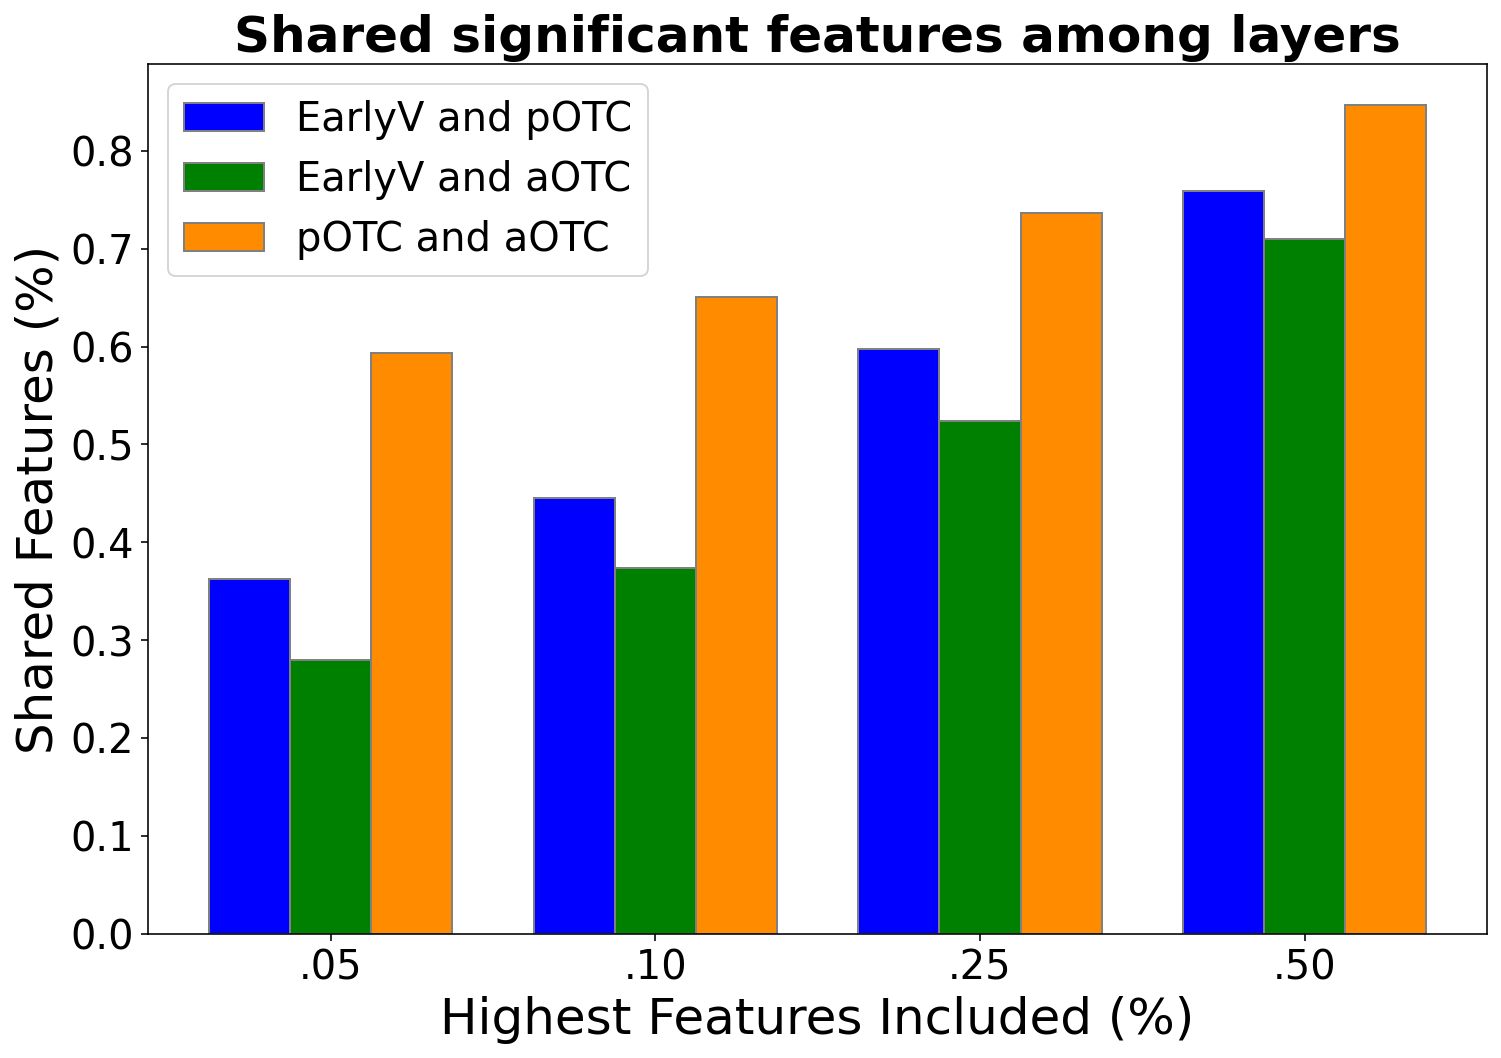

In [ ]:
pcents = [str(x) for x in percentages]
pcents

bar_width = .25
xs = np.arange(percentages.size)
xs2 = [x + bar_width for x in xs]
xs3 = [x + bar_width for x in xs2]

fig = plt.subplots(figsize =(12, 8))

plt.bar(xs, pt_ev_p_percentages_same, width =bar_width, color='blue', edgecolor='gray', label='EarlyV and pOTC')
plt.bar(xs2, pt_ev_a_percentages_same, width =bar_width, color='green', edgecolor='gray', label='EarlyV and aOTC')
plt.bar(xs3, pt_p_a_percentages_same, width=bar_width, color='darkorange', edgecolor='gray', label='pOTC and aOTC')

plt.legend(loc="upper left", prop={'size':20})

plt.xlabel('Highest Features Included (%)', size=25)
plt.xticks([r + bar_width for r in range(percentages.size)],
           ['.05', '.10', '.25', '.50'],
           size=20)
plt.ylabel('Shared Features (%)', size=25)
plt.yticks(size=20)
plt.title('Shared significant features among layers', size=25, fontweight="bold")



plt.savefig('shared features bar plot.png', dpi=300)


for alexnet gn (no drop off)

In [ ]:
percentages = np.array([.05, .10, .25, .50])

gn_ev_p_percentages_same = np.zeros(percentages.size)

for i in range(percentages.size):
  p = percentages[i]
  ev_gn = earlyv_gn[p]
  p_gn = potc_gn[p]
  assert len(ev_gn) == len(p_gn), "must be same size"
  shared_features = get_shared_features(ev_gn, p_gn)
  percentage_same = len(shared_features) /  len(ev_gn)
  gn_ev_p_percentages_same[i] = percentage_same
gn_ev_p_percentages_same

array([0.40686275, 0.46454768, 0.59472656, 0.7578125 ])

In [ ]:
gn_ev_a_percentages_same = np.zeros(percentages.size)

for i in range(percentages.size):
  p = percentages[i]
  ev_gn = earlyv_gn[p]
  a_gn = aotc_gn[p]
  assert len(ev_gn) == len(a_gn), "must be same size"
  shared_features = get_shared_features(ev_gn, a_gn)
  percentage_same = len(shared_features) /  len(ev_gn)
  gn_ev_a_percentages_same[i] = percentage_same
gn_ev_a_percentages_same


array([0.37745098, 0.4400978 , 0.54394531, 0.71289062])

In [ ]:
gn_p_a_percentage_same = np.zeros(percentages.size)

for i in range(percentages.size):
  p = percentages[i]
  p_gn = potc_gn[p]
  a_gn = aotc_gn[p]
  assert len(p_gn) == len(a_gn), "must be same size"
  shared_features = get_shared_features(p_gn, a_gn)
  percentage_same = len(shared_features) /  len(p_gn)
  gn_p_a_percentage_same[i] = percentage_same
gn_p_a_percentage_same

array([0.61764706, 0.71149144, 0.7578125 , 0.85595703])

--2022-07-28 16:04:05--  https://www.dropbox.com/s/dkcnr93ibql2m0l/run_lesioned_val_all_layers.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/dkcnr93ibql2m0l/run_lesioned_val_all_layers.zip [following]
--2022-07-28 16:04:08--  https://www.dropbox.com/s/raw/dkcnr93ibql2m0l/run_lesioned_val_all_layers.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc40906399b8cf4df7f317f4ac46.dl.dropboxusercontent.com/cd/0/inline/Bp94klWUPmuim6HYauKvbxUNnG9GQcSdDgdUSlU5yS8dWVROET0UvsLV13FYBm7Fu4M6n-zb45vEhWa9W8cljGrLZ9kdmC_78r6GBmfhtn29UPusuTcij5BrfOHkgtZ39VtoQFPuIin79O4ixYczhAkLqDXCidRgR8hn3I7OhumuNQ/file# [following]
--2022-07-28 16:04:09--  https://uc40906399b8cf4df7f317f4ac46.dl.dropboxusercontent.com/cd/0/inline/Bp94kl